In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import pickle
import matplotlib.pyplot as plt

In [6]:
train=pd.read_excel('Data_Train.xlsx')
sample = pd.read_excel('Sample_submission.xlsx')
test = pd.read_excel('Test_set.xlsx')
test = pd.concat([test,sample],axis=1)

In [7]:
train

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [8]:
test

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,15998
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,16612
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,25572
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,25778
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,16934
...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,14046
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,14086
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,22720
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,23544


In [9]:
df = pd.concat([train,test])

In [10]:
df.drop(labels=['Route','Arrival_Time','Duration','Additional_Info'],axis=1,inplace=True)

In [11]:
df.isnull().sum()
print(df.shape)
df.dropna(inplace=True)
print(df.shape)

(13354, 7)
(13353, 7)


In [12]:
df['Day']= df['Date_of_Journey'].str.split('/').str[0]
df['Month']= df['Date_of_Journey'].str.split('/').str[1]
df['Year']= df['Date_of_Journey'].str.split('/').str[2]

In [13]:
df

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Total_Stops,Price,Day,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,non-stop,3897,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,05:50,2 stops,7662,1,05,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,2 stops,13882,9,06,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,1 stop,6218,12,05,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,1 stop,13302,01,03,2019
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,20:30,1 stop,14046,6,06,2019
2667,IndiGo,27/03/2019,Kolkata,Banglore,14:20,non-stop,14086,27,03,2019
2668,Jet Airways,6/03/2019,Delhi,Cochin,21:50,1 stop,22720,6,03,2019
2669,Air India,6/03/2019,Delhi,Cochin,04:00,1 stop,23544,6,03,2019


In [14]:
df['Total_Stops']=df['Total_Stops'].str.replace('non-','0 ')

In [15]:
df

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Total_Stops,Price,Day,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,0 stop,3897,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,05:50,2 stops,7662,1,05,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,2 stops,13882,9,06,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,1 stop,6218,12,05,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,1 stop,13302,01,03,2019
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,20:30,1 stop,14046,6,06,2019
2667,IndiGo,27/03/2019,Kolkata,Banglore,14:20,0 stop,14086,27,03,2019
2668,Jet Airways,6/03/2019,Delhi,Cochin,21:50,1 stop,22720,6,03,2019
2669,Air India,6/03/2019,Delhi,Cochin,04:00,1 stop,23544,6,03,2019


In [16]:
df['Stops'] = df['Total_Stops'].str.split().str[0]
df.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Total_Stops,Price,Day,Month,Year,Stops
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,0 stop,3897,24,03,2019,0
1,Air India,1/05/2019,Kolkata,Banglore,05:50,2 stops,7662,1,05,2019,2
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,2 stops,13882,9,06,2019,2
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,1 stop,6218,12,05,2019,1
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,1 stop,13302,01,03,2019,1


In [17]:
df['Departure_Hour'] = df['Dep_Time'].str.split(':').str[0]
df['Departure_Minute'] = df['Dep_Time'].str.split(':').str[1]
df.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Total_Stops,Price,Day,Month,Year,Stops,Departure_Hour,Departure_Minute
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,0 stop,3897,24,03,2019,0,22,20
1,Air India,1/05/2019,Kolkata,Banglore,05:50,2 stops,7662,1,05,2019,2,05,50
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,2 stops,13882,9,06,2019,2,09,25
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,1 stop,6218,12,05,2019,1,18,05
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,1 stop,13302,01,03,2019,1,16,50


In [18]:
df['Day'] = df['Day'].astype(int)
df['Month'] = df['Month'].astype(int)
df['Year'] = df['Year'].astype(int)
df['Stops'] = df['Stops'].astype(int)
df['Departure_Hour'] = df['Departure_Hour'].astype(int)
df['Departure_Minute'] = df['Departure_Minute'].astype(int)

In [19]:
df.drop(['Date_of_Journey','Dep_Time','Total_Stops'],axis=1,inplace=True)
df.head()

,Airline,Source,Destination,Price,Day,Month,Year,Stops,Departure_Hour,Departure_Minute
0,IndiGo,Banglore,New Delhi,3897,24,3,2019,0,22,20
1,Air India,Kolkata,Banglore,7662,1,5,2019,2,5,50
2,Jet Airways,Delhi,Cochin,13882,9,6,2019,2,9,25
3,IndiGo,Kolkata,Banglore,6218,12,5,2019,1,18,5
4,IndiGo,Banglore,New Delhi,13302,1,3,2019,1,16,50


In [20]:
source_dict = {y:x for x,y in enumerate(df.Source.value_counts().index.sort_values())}
source_dict

{'Banglore': 0, 'Chennai': 1, 'Delhi': 2, 'Kolkata': 3, 'Mumbai': 4}

In [21]:
destination_dict = {'Banglore':0,'Cochin':1,'Delhi':2,'Kolkata': 3,'Hyderabad':4,'New Delhi':5}

In [22]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Airline_Encoded']= le.fit_transform(df['Airline'].values)

df3 = df[['Airline']].copy()
df3['Encoded']=df['Airline_Encoded']
df3=df3.drop_duplicates('Airline').reset_index().iloc[:,1:]
d5=df3.Airline.values
d6=df3.Encoded.values
airline_dict = dict(zip(d5,d6))

print(airline_dict)

{'IndiGo': 3, 'Air India': 1, 'Jet Airways': 4, 'SpiceJet': 8, 'Multiple carriers': 6, 'GoAir': 2, 'Vistara': 10, 'Air Asia': 0, 'Vistara Premium economy': 11, 'Jet Airways Business': 5, 'Multiple carriers Premium economy': 7, 'Trujet': 9}


In [23]:
df['Source_Encoded']=df['Source'].map(source_dict)
df['Destination_Encoded']=df['Destination'].map(destination_dict)

In [24]:
df

,Airline,Source,Destination,Price,Day,Month,Year,Stops,Departure_Hour,Departure_Minute,Airline_Encoded,Source_Encoded,Destination_Encoded
0,IndiGo,Banglore,New Delhi,3897,24,3,2019,0,22,20,3,0,5
1,Air India,Kolkata,Banglore,7662,1,5,2019,2,5,50,1,3,0
2,Jet Airways,Delhi,Cochin,13882,9,6,2019,2,9,25,4,2,1
3,IndiGo,Kolkata,Banglore,6218,12,5,2019,1,18,5,3,3,0
4,IndiGo,Banglore,New Delhi,13302,1,3,2019,1,16,50,3,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,14046,6,6,2019,1,20,30,1,3,0
2667,IndiGo,Kolkata,Banglore,14086,27,3,2019,0,14,20,3,3,0
2668,Jet Airways,Delhi,Cochin,22720,6,3,2019,1,21,50,4,2,1
2669,Air India,Delhi,Cochin,23544,6,3,2019,1,4,0,1,2,1


In [25]:
df = df.drop(['Airline','Source','Destination'],axis=1)
df

,Price,Day,Month,Year,Stops,Departure_Hour,Departure_Minute,Airline_Encoded,Source_Encoded,Destination_Encoded
0,3897,24,3,2019,0,22,20,3,0,5
1,7662,1,5,2019,2,5,50,1,3,0
2,13882,9,6,2019,2,9,25,4,2,1
3,6218,12,5,2019,1,18,5,3,3,0
4,13302,1,3,2019,1,16,50,3,0,5
...,...,...,...,...,...,...,...,...,...,...
2666,14046,6,6,2019,1,20,30,1,3,0
2667,14086,27,3,2019,0,14,20,3,3,0
2668,22720,6,3,2019,1,21,50,4,2,1
2669,23544,6,3,2019,1,4,0,1,2,1


Text(0.5, 1.0, 'Frequency of Flights in a month per day')

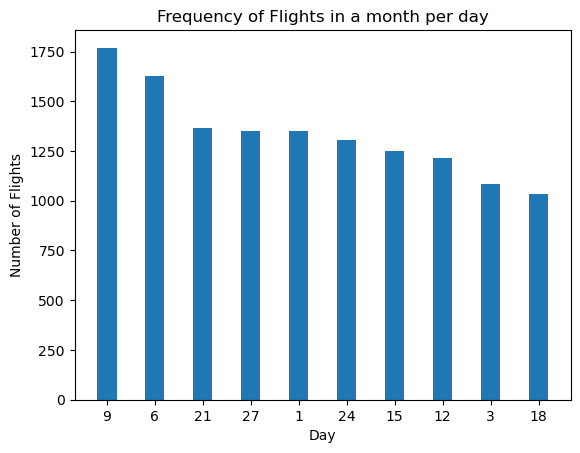

In [26]:
day = list(df.Day.value_counts().index)
value = list(df.Day.value_counts())
date = [str(x) for x in day]
plt.bar(date,value,width = 0.4)
plt.xlabel("Day")
plt.ylabel("Number of Flights")
plt.title("Frequency of Flights in a month per day")

Text(0.5, 1.0, 'Number of Flights per Month')

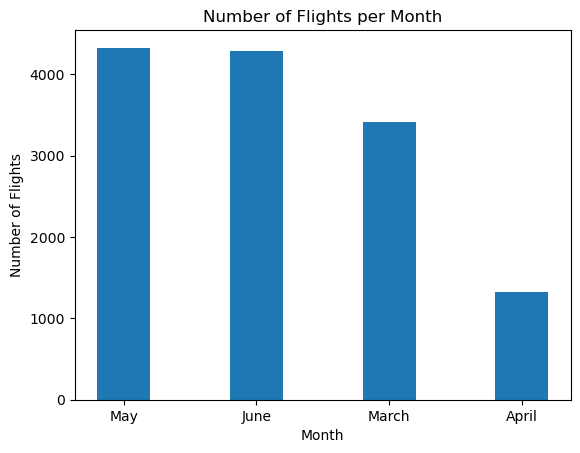

In [27]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'] 
month = list(df.Month.value_counts().index)
value = list(df.Month.value_counts())
index = [months[x-1] for x in month]
plt.bar(index,value,width = 0.4)
plt.xlabel("Month")
plt.ylabel("Number of Flights")
plt.title("Number of Flights per Month")

### Feature Selection


In [28]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel 
from sklearn.model_selection import train_test_split

In [29]:
df_train = df[:10600]

In [30]:
df_train

,Price,Day,Month,Year,Stops,Departure_Hour,Departure_Minute,Airline_Encoded,Source_Encoded,Destination_Encoded
0,3897,24,3,2019,0,22,20,3,0,5
1,7662,1,5,2019,2,5,50,1,3,0
2,13882,9,6,2019,2,9,25,4,2,1
3,6218,12,5,2019,1,18,5,3,3,0
4,13302,1,3,2019,1,16,50,3,0,5
...,...,...,...,...,...,...,...,...,...,...
10596,10262,1,6,2019,1,10,0,4,2,1
10597,4544,21,4,2019,0,15,15,4,0,2
10598,12373,9,5,2019,1,18,15,4,2,1
10599,11281,15,5,2019,2,5,0,1,2,1


In [31]:
X = df_train.drop(['Price'],axis=1)
y = df_train.Price


In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [33]:
model = SelectFromModel(Lasso(alpha=0.005,random_state=0))
model.fit(X_train,y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [34]:
tmp_x = X_train
features_selected = tmp_x.columns[model.get_support()]

In [35]:
features_selected,tmp_x.shape,len(features_selected)

(Index(['Day', 'Month', 'Stops', 'Departure_Hour', 'Departure_Minute',
        'Airline_Encoded', 'Source_Encoded', 'Destination_Encoded'],
       dtype='object'),
 (7420, 9),
 8)

In [36]:
X_train = X_train.drop(['Year'],axis=1)
X_test = X_test.drop(['Year'],axis=1)

### Feature Normalization

In [37]:
from sklearn.preprocessing import StandardScaler

In [38]:
scaler = StandardScaler()

In [39]:
X_train = pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)
X_test = pd.DataFrame(scaler.fit_transform(X_test),columns=X_test.columns)

### Traning Model

In [40]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor

In [41]:
reg = GradientBoostingRegressor()

In [42]:
reg.fit(X_train, y_train)

GradientBoostingRegressor()

In [43]:
reg_pred = reg.predict(X_test)

In [44]:
r2_score(y_true=y_test,y_pred=reg_pred)

0.7424927826500684

In [45]:
mean_squared_error(y_true=y_test,y_pred=reg_pred,squared=False)

2303.206343827279

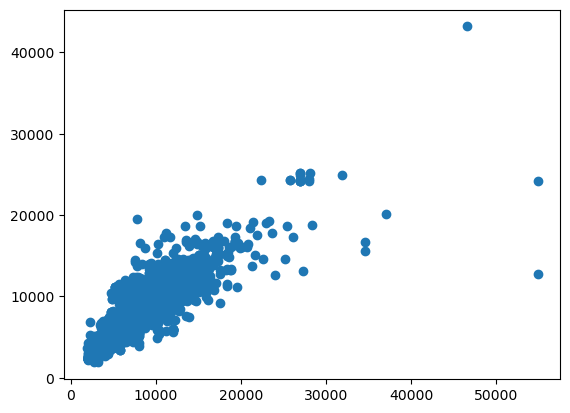

In [46]:
plt.scatter(y_test,reg_pred)

<AxesSubplot:xlabel='Price', ylabel='Density'>

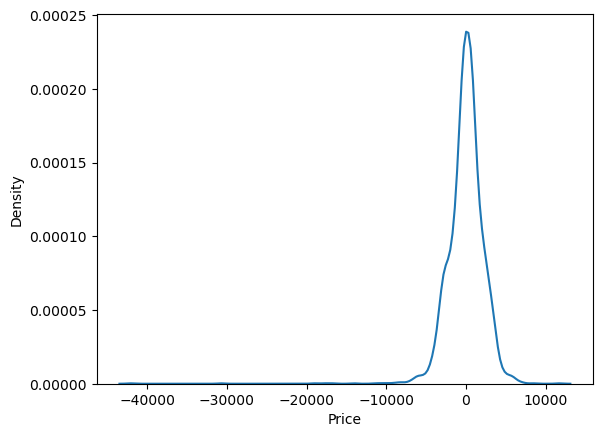

In [48]:
sns.kdeplot(x=reg_pred-y_test)